In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

## Exploration and cleanup

In [2]:
products = pd.read_csv('data/products.csv')

products.columns = products.columns.str.lower().str.removeprefix('product_')

products['id'] = pd.to_numeric(products['id'].str.removeprefix('P-'))
products = products.set_index('id')

products['category_id'] = pd.to_numeric(products['category_id'].str.removeprefix('CAT-'))

products['launch_date'] = pd.to_datetime(products['launch_date'])

display(products.head())
products.info()

,name,category_id,launch_date,price
id,,,,
1,MacBook,1,2023-09-17,1149
2,MacBook Air (M1),1,2023-11-11,1783
3,MacBook Air (M2),1,2020-05-24,1588
4,MacBook Pro 13-inch,1,2021-01-17,1351
5,MacBook Pro 14-inch,1,2024-05-12,768


<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 1 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         89 non-null     object        
 1   category_id  89 non-null     int64         
 2   launch_date  89 non-null     datetime64[ns]
 3   price        89 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.5+ KB


In [3]:
category = pd.read_csv('data/category.csv')

category.columns = category.columns.str.removeprefix('category_')

category['id'] = pd.to_numeric(category['id'].str.removeprefix('CAT-'))
category = category.set_index('id')

display(category.head())
category.info()

,name
id,
1,Laptop
2,Audio
3,Tablet
4,Smartphone
5,Wearable


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


In [4]:
stores = pd.read_csv('data/stores.csv')

stores.columns = stores.columns.str.lower().str.removeprefix('store_')

stores['id'] = pd.to_numeric(stores['id'].str.removeprefix('ST-'))
stores = stores.set_index('id')

display(stores.head())
stores.info()

,name,city,country
id,,,
1,Apple Fifth Avenue,New York,United States
2,Apple Union Square,San Francisco,United States
3,Apple Michigan Avenue,Chicago,United States
4,Apple The Grove,Los Angeles,United States
5,Apple SoHo,New York,United States


<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1 to 75
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     75 non-null     object
 1   city     75 non-null     object
 2   country  75 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [5]:
warranty = pd.read_csv('data/warranty.csv')

warranty.columns = warranty.columns.str.removeprefix('claim_')

warranty['id'] = pd.to_numeric(warranty['id'].str.removeprefix('CL-'))
warranty = warranty.set_index('id')

warranty['date'] = pd.to_datetime(warranty['date'])

display(warranty.head())
warranty.info()

,date,sale_id,repair_status
id,,,
58750,2024-01-30,YG-8782,Completed
8874,2024-06-25,QX-999001,Pending
14486,2024-08-13,JG-46890,Pending
42187,2024-09-19,XJ-1731,Pending
37590,2024-09-16,FG-95080,Completed


<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 58750 to 78522
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30000 non-null  datetime64[ns]
 1   sale_id        30000 non-null  object        
 2   repair_status  30000 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 937.5+ KB


In [6]:
sales = pd.read_csv('data/sales.csv')

sales.columns = sales.columns.str.removeprefix('sale_')

sales = sales.set_index('id')

sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

sales['store_id'] = pd.to_numeric(sales['store_id'].str.removeprefix('ST-'))
sales['product_id'] = pd.to_numeric(sales['product_id'].str.removeprefix('P-'))

display(sales.head())
sales.info()

,date,store_id,product_id,quantity
id,,,,
YG-8782,2023-06-16,10,38,10
QX-999001,2022-04-13,63,48,10
JG-46890,2021-07-05,26,79,5
XJ-1731,2022-07-20,15,24,9
FG-95080,2022-03-18,35,69,7


<class 'pandas.core.frame.DataFrame'>
Index: 1040200 entries, YG-8782 to FJ-0643
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1040200 non-null  datetime64[ns]
 1   store_id    1040200 non-null  int64         
 2   product_id  1040200 non-null  int64         
 3   quantity    1040200 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.7+ MB


## Descriptive analysis

In [7]:
sales['year'] = sales['date'].dt.year

joined_sales = (sales
    .join(stores['country'], on='store_id')
    .join(products['price'], on='product_id')
    .drop(['date', 'store_id', 'product_id'], axis=1)
)

joined_sales['revenue'] = joined_sales['quantity'] * joined_sales['price']

groupby = joined_sales.groupby(['year', 'country'])
    
agg_sales = groupby.agg(
    units_sold = ('quantity', 'sum'),
    total_revenue = ('revenue', 'sum'),
)
agg_sales['n_orders'] = groupby.size()

agg_sales

units_sold  total_revenue  n_orders
year country                                            
2020 Australia           110341      118359049     19990
     Austria              15379       16846043      2790
     Canada               78965       85102058     14377
     China               110088      118359886     19967
     Colombia             29967       32355688      5563
...                         ...            ...       ...
2024 Taiwan               13593       14689981      2456
     Thailand             40322       43487986      7353
     UAE                  66835       72172319     12153
     United Kingdom       54978       59035920      9944
     United States       204447      220653559     37028

[95 rows x 3 columns]

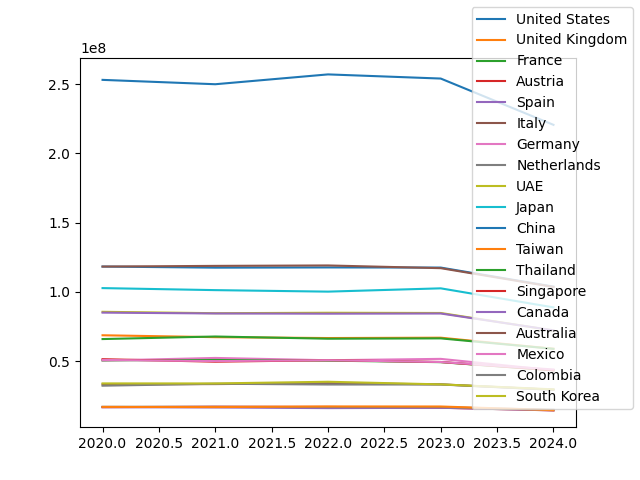

In [8]:
countries = stores['country'].unique()

fig, ax = plt.subplots()

for country in countries:
    country_sales = agg_sales.xs(country, level='country')
    
    ax.plot(country_sales.index, country_sales['total_revenue'], label=country)

fig.legend()